In [1]:
# importing necessary libraries
import pyforest
import warnings

warnings.filterwarnings('ignore')

In [23]:
#Loading dataset 
df = pd.read_csv(r'C:\Users\hp\Documents\Bike-Sharing-Dataset\day.csv')

<IPython.core.display.Javascript object>

In [3]:
#a sneakpick of data
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [21]:
# datatype of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [24]:
# droping index column and other dependent variables
df = df.drop(['instant','cnt','casual'], axis=1)

In [25]:
#Stats of data
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,3656.172367
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1560.256377
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,20.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,2497.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,3662.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,4776.500000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,6946.000000


In [32]:
#correlation with dependent variable
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.411623
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.594248
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.293488
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,-0.108745
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.057367
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,0.303907
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.260388
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.540012
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.544192
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.091089


In [33]:
#checking the data for duplicates
duplicate = df[df.duplicated()]
print("Total number of duplicated: ",len(duplicate))

Total number of duplicated:  0


In [9]:
#Numerical Variables
num_var = df[['temp','atemp','hum','windspeed','registered']]

#catogarical variables
cat_var = df.drop(['temp','atemp','hum','windspeed','casual','registered','dteday'], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

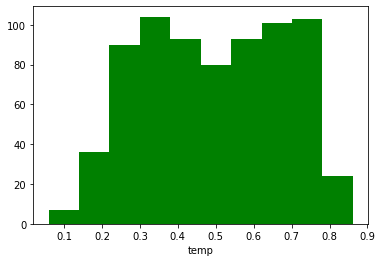

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

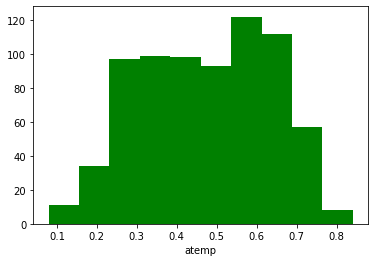

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

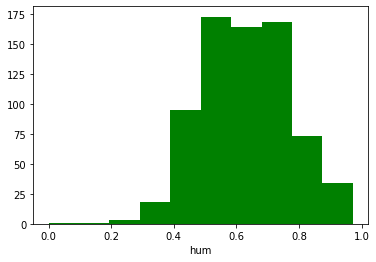

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

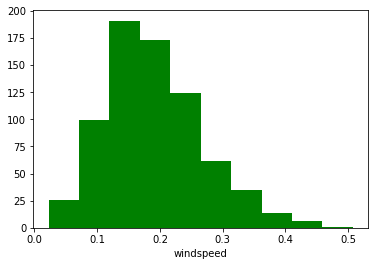

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

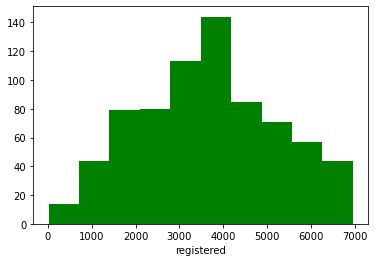

In [20]:
#plotting histogram for numerical columns
for i in list(num_var.columns):
    plt.hist(num_var[[i]], color = 'green',stacked = True )
    plt.xlabel(i)
    plt.show()

In [11]:
#correlation of 
num_var.corr()

,temp,atemp,hum,windspeed,registered
temp,1.000000,0.991702,0.126963,-0.157944,0.540012
atemp,0.991702,1.000000,0.139988,-0.183643,0.544192
hum,0.126963,0.139988,1.000000,-0.248489,-0.091089
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.217449
registered,0.540012,0.544192,-0.091089,-0.217449,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

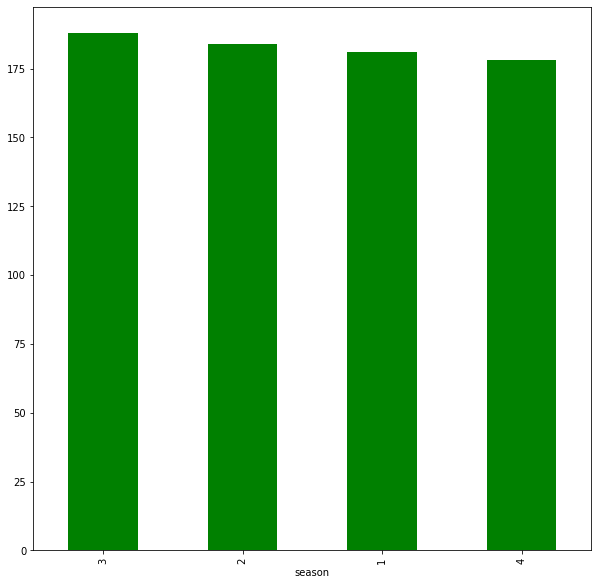

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

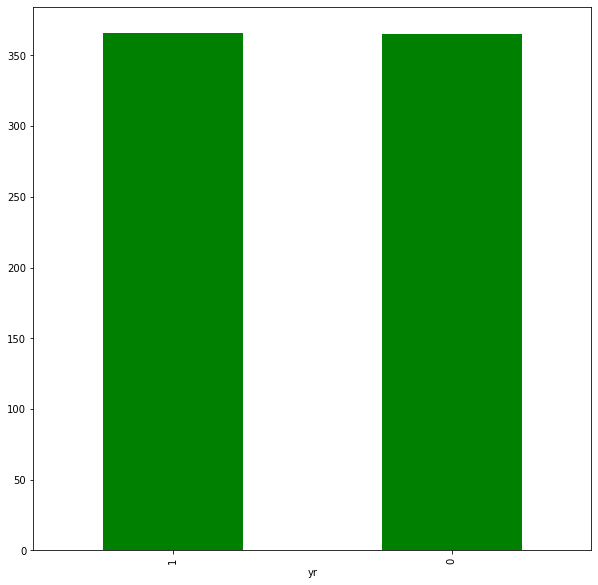

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

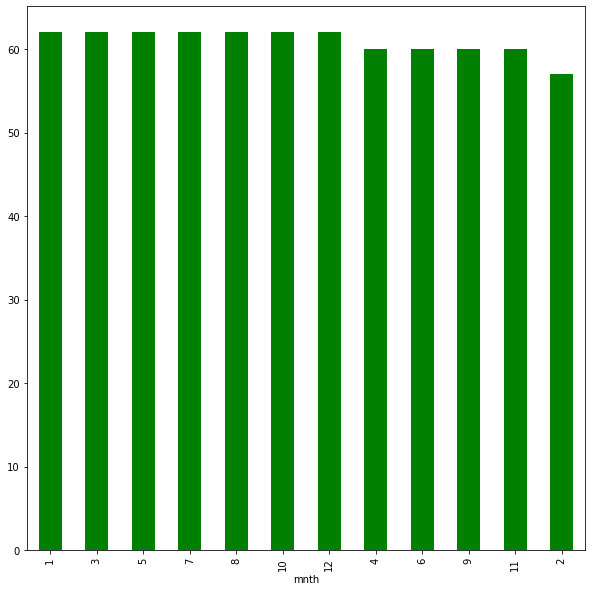

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

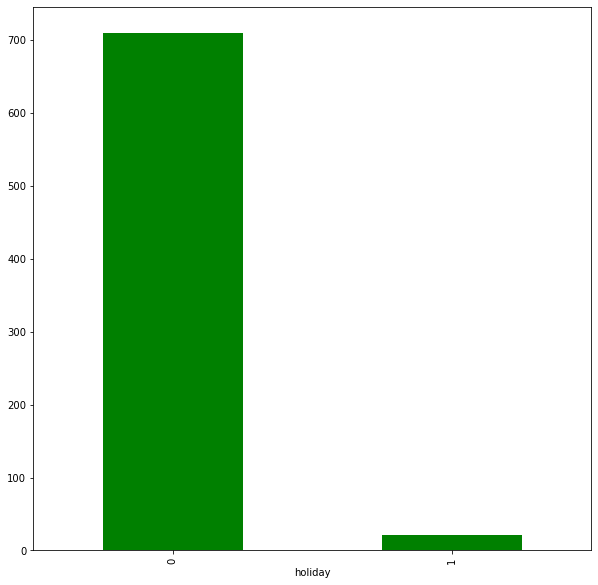

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

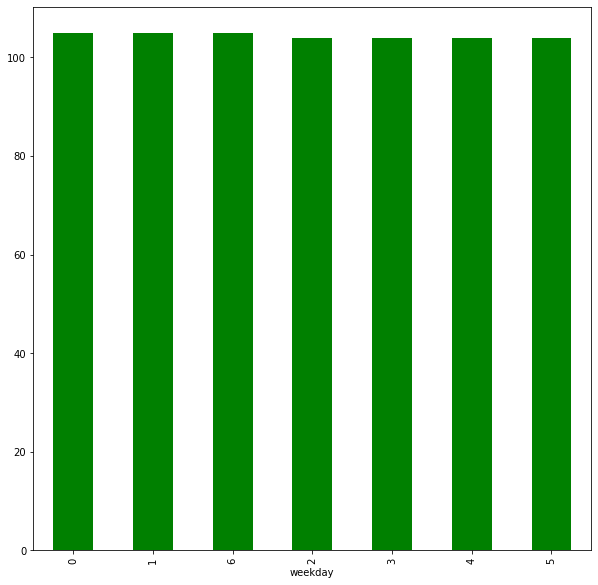

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

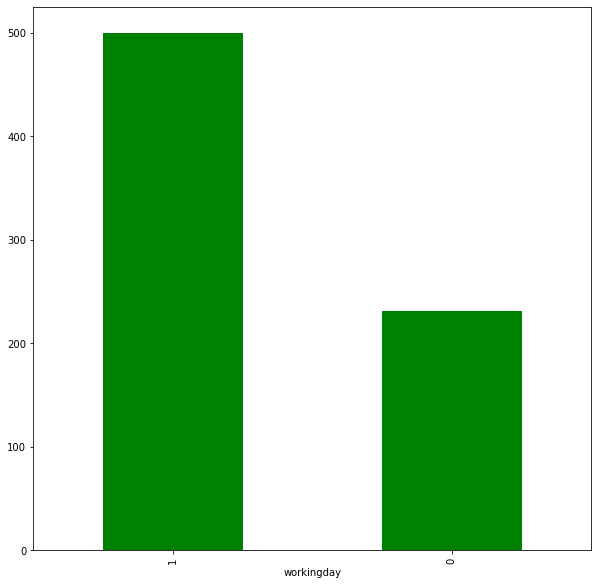

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

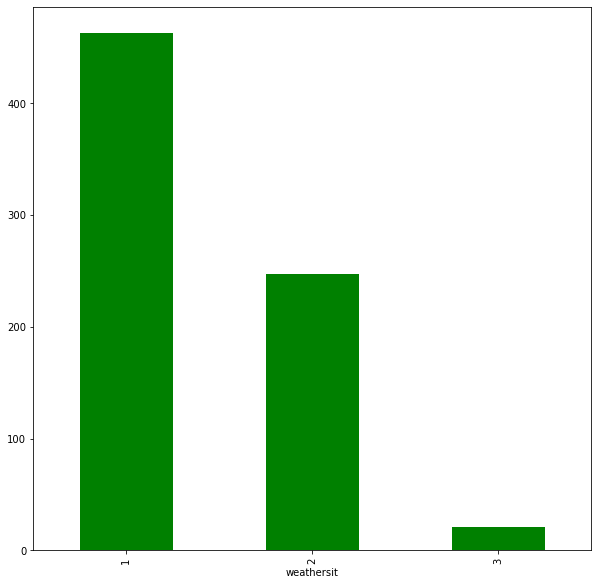

In [12]:
for i in list(cat_var.columns):
    cat_var[i].value_counts().plot(kind = 'bar', figsize=(10,10), color = 'green', fontsize = 10)
    plt.xlabel(i)
    plt.show()

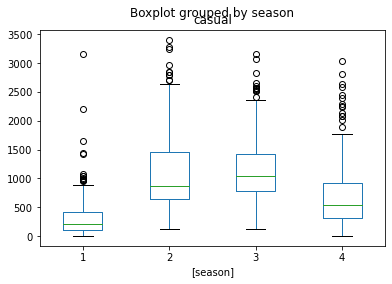

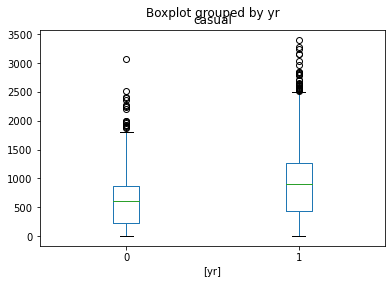

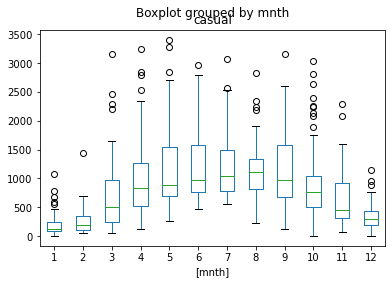

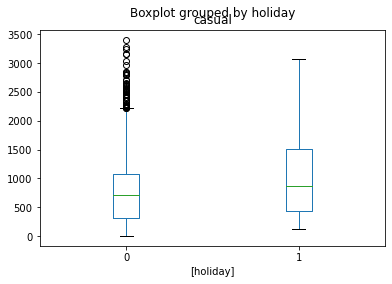

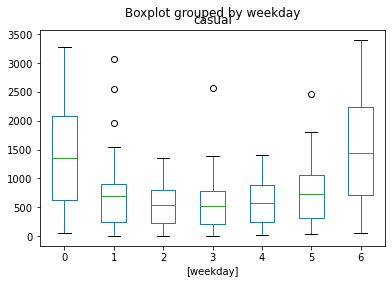

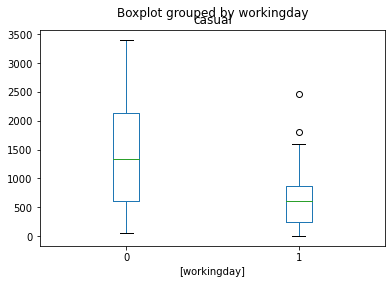

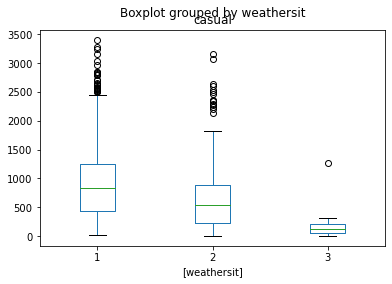

In [13]:
for i in cat_var:
    df.boxplot(column =['casual'], by = [i], grid= False)

<AxesSubplot:title={'center':'registered'}, xlabel='[workingday, holiday]'>

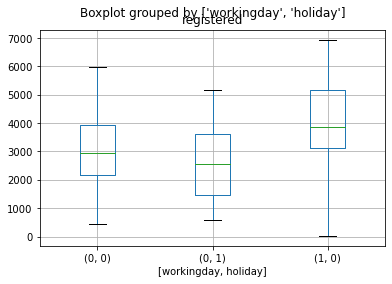

In [14]:
df.boxplot(column = ['registered'], by = ['workingday', 'holiday'])

In [15]:
x=df.drop(['casual','registered','dteday'], axis=1)
x= sm.add_constant(x)
y=df['registered']

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

In [16]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y, test_size=0.2,stratify = x['yr'],  random_state =20)


<IPython.core.display.Javascript object>

In [17]:
x_tr, y_tr

(     const  season  yr  mnth  holiday  weekday  workingday  weathersit  \
 626    1.0       3   1     9        0        2           1           2   
 546    1.0       3   1     6        0        6           0           1   
 596    1.0       3   1     8        0        0           0           2   
 726    1.0       1   1    12        0        4           1           2   
 602    1.0       3   1     8        0        6           0           2   
 ..     ...     ...  ..   ...      ...      ...         ...         ...   
 245    1.0       3   0     9        0        6           0           1   
 472    1.0       2   1     4        0        2           1           1   
 84     1.0       2   0     3        0        6           0           1   
 314    1.0       4   0    11        1        5           0           1   
 135    1.0       2   0     5        0        1           1           1   
 
          temp     atemp       hum  windspeed  
 626  0.623333  0.565067  0.872500   0.357587  
 5

In [136]:
model = sm.OLS(y_tr,x_tr).fit()
model.summary()

<IPython.core.display.Javascript object>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     221.5
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          5.65e-198
Time:                        23:16:20   Log-Likelihood:                -4641.2
No. Observations:                 584   AIC:                             9306.
Df Residuals:                     572   BIC:                             9359.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        737.8311    208.712      3.535      0.000     327.895    1147.767
season       480.8365     49.522      9.710      0.000     383.570     578.103
yr          1738.8351     57.611     30.182      0.000    1625.680    1851.990
mnth         -41.0608     15.362     -2.673      0.008     -71.233     -10.888
holiday     -186.0168    177.365     -1.049      0.295    -534.383     162.349
weekday       41.3723     14.530      2.847      0.005      12.833      69.911
workingday   969.3927     64.132     15.116      0.000     843.430    1095.356
weathersit  -523.9895     68.721     -7.625      0.000    -658.967    -389.012
temp         688.5937   1164.134      0.592      0.554   -1597.904    2975.092
atemp       2869.7049   1317.024      2.179      0.030     282.911    5456.499
hum         -552.1903    276.875     -1.994      0.047   -1096.005      -8.375
windspeed  -1668.9452    408.749     -4.083      0.000   -2471.777    -866.113
==============================================================================
Omnibus:                      133.531   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.495
Skew:                          -1.098   Prob(JB):                     9.73e-86
Kurtosis:                       6.357   Cond. No.                         525.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

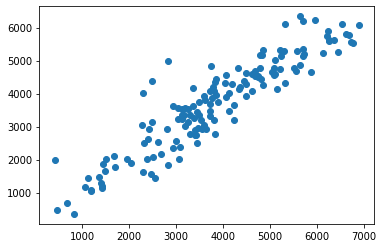

In [137]:
y_pred = model.predict(x_ts)
plt.scatter(y_ts, y_pred)



In [138]:
from sklearn.metrics import mean_squared_error, r2_score

In [139]:
mean_squared_error(y_ts, y_pred), r2_score(y_ts, y_pred)

(373285.8696807482, 0.8355448205217035)

#### One Hot Encoding

In [22]:
one_hot = pd.get_dummies(cat_var, columns = list(cat_var.columns))
print(one_hot)

<IPython.core.display.Javascript object>

     season_1  season_2  season_3  season_4  yr_0  yr_1  mnth_1  mnth_2  \
0           1         0         0         0     1     0       1       0   
1           1         0         0         0     1     0       1       0   
2           1         0         0         0     1     0       1       0   
3           1         0         0         0     1     0       1       0   
4           1         0         0         0     1     0       1       0   
..        ...       ...       ...       ...   ...   ...     ...     ...   
726         1         0         0         0     0     1       0       0   
727         1         0         0         0     0     1       0       0   
728         1         0         0         0     0     1       0       0   
729         1         0         0         0     0     1       0       0   
730         1         0         0         0     0     1       0       0   

     mnth_3  mnth_4  ...  weekday_2  weekday_3  weekday_4  weekday_5  \
0         0       0  ...   

In [23]:
for i in num_var:
    one_hot[i] = num_var[i]

In [24]:
X=one_hot.drop(['registered'], axis=1)
X= sm.add_constant(X)
Y=one_hot['registered']

<IPython.core.display.Javascript object>

In [140]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X,Y, test_size=0.2, random_state =20)
model1 = sm.OLS(Y_tr,X_tr).fit()
model1.summary()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.91e-208
Time:                        23:16:32   Log-Likelihood:                -4568.0
No. Observations:                 584   AIC:                             9194.
Df Residuals:                     555   BIC:                             9321.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          741.7303     79.733      9.303      0.000     585.116     898.345
season_1      -566.0090    106.028     -5.338      0.000    -774.275    -357.744
season_2        58.7240    111.454      0.527      0.598    -160.198     277.646
season_3       294.5909    117.658      2.504      0.013      63.480     525.701
season_4       954.4245    110.597      8.630      0.000     737.185    1171.664
yr_0          -503.1197     48.525    -10.368      0.000    -598.435    -407.804
yr_1          1244.8500     47.081     26.440      0.000    1152.371    1337.329
mnth_1        -163.4689    162.759     -1.004      0.316    -483.169     156.231
mnth_2          21.0365    148.886      0.141      0.888    -271.413     313.486
mnth_3         173.8145    115.418      1.506      0.133     -52.895     400.524
mnth_4         135.5749    140.510      0.965      0.335    -140.422     411.571
mnth_5         421.5636    146.247      2.883      0.004     134.297     708.830
mnth_6         331.4312    142.517      2.326      0.020      51.492     611.370
mnth_7        -214.8114    166.445     -1.291      0.197    -541.751     112.128
mnth_8          58.7502    160.142      0.367      0.714    -255.809     373.309
mnth_9         524.9058    124.833      4.205      0.000     279.703     770.109
mnth_10         21.3238    139.053      0.153      0.878    -251.810     294.458
mnth_11       -358.4314    145.540     -2.463      0.014    -644.308     -72.555
mnth_12       -209.9584    128.060     -1.640      0.102    -461.499      41.582
holiday_0      534.8551     68.986      7.753      0.000     399.349     670.361
holiday_1      206.8752     83.312      2.483      0.013      43.230     370.520
weekday_0     -217.9996     57.140     -3.815      0.000    -330.236    -105.763
weekday_1       25.4169     62.476      0.407      0.684     -97.302     148.136
weekday_2      206.9287     70.066      2.953      0.003      69.302     344.556
weekday_3      249.9295     63.517      3.935      0.000     125.167     374.692
weekday_4      276.4916     64.477      4.288      0.000     149.843     403.140
weekday_5      157.0649     64.083      2.451      0.015      31.190     282.939
weekday_6       43.8984     54.743      0.802      0.423     -63.630     151.427
workingday_0    32.7740     55.099      0.595      0.552     -75.453     141.001
workingday_1   708.9563     39.493     17.952      0.000     631.383     786.529
weathersit_1   893.8520     61.049     14.642      0.000     773.937    1013.767
weathersit_2   522.6531     61.762      8.462      0.000     401.338     643.969
weathersit_3  -674.7748    122.009     -5.531      0.000    -914.432    -435.118
temp          1346.2304   1180.113      1.141      0.254    -971.804    3664.265
atemp         1603.4505   1226.082      1.308      0.191    -804.879    4011.780
hum  

<IPython.core.display.Javascript object>

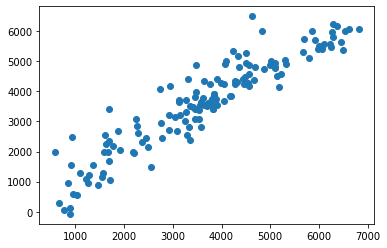

In [141]:
Y_pred = model1.predict(X_ts)
plt.scatter(Y_ts, Y_pred)


In [142]:
mean_squared_error(Y_ts, Y_pred), r2_score(Y_ts, Y_pred)

(330701.01550927584, 0.8631002086401605)

#### Decision Tree

In [40]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 8) 
  
# fit the regressor with X and Y data
regressor.fit(x_tr, y_tr)

DecisionTreeRegressor(random_state=8)

In [41]:
DS_y_pred = regressor.predict(x_ts)

<IPython.core.display.Javascript object>

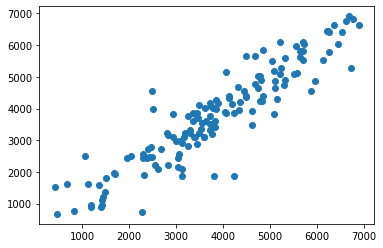

In [42]:
plt.scatter(y_ts, DS_y_pred)


In [43]:
mean_squared_error(y_ts, DS_y_pred), r2_score(y_ts, DS_y_pred)

(370260.32653061225, 0.8368777567032968)

In [32]:
imp = regressor.feature_importances_

<IPython.core.display.Javascript object>

<AxesSubplot:>

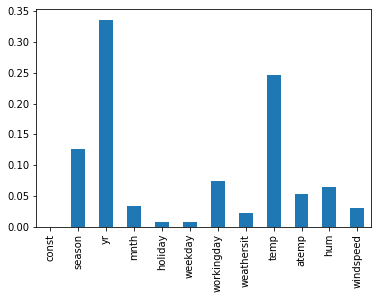

In [33]:
pd.Series(imp, index = x_tr.columns).plot(kind = 'bar' )

#### One hot Encode with Decision tree

In [34]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 8) 
  
# fit the regressor with X and Y data
regressor.fit(X_tr, Y_tr)

DecisionTreeRegressor(random_state=8)

In [35]:
DS_y_hot_pred = regressor.predict(X_ts)

<IPython.core.display.Javascript object>

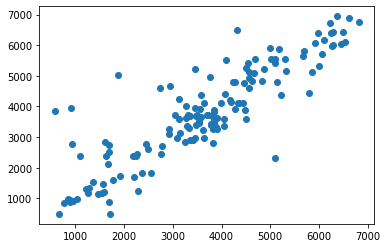

In [36]:
plt.scatter(Y_ts, DS_y_hot_pred)

In [37]:
mean_squared_error(Y_ts, DS_y_hot_pred), r2_score(Y_ts, DS_y_hot_pred)

(624078.918367347, 0.7416510088879129)

#### Bagging

In [94]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

In [128]:
regressor = DecisionTreeRegressor() 
regr = BaggingRegressor(base_estimator= regressor,  n_estimators=20, bootstrap = True).fit(x_tr, y_tr)

In [129]:
DS_y_pred = regr.predict(x_ts)

<IPython.core.display.Javascript object>

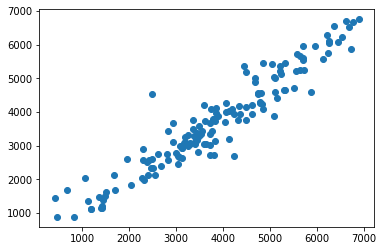

In [130]:
plt.scatter(y_ts, DS_y_pred)

In [131]:
mean_squared_error(y_ts, DS_y_pred), r2_score(y_ts, DS_y_pred)

(232739.4319727891, 0.8974640934319411)

In [114]:
regr.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 8,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(random_state=8),
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Bagging with linear regression


In [148]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

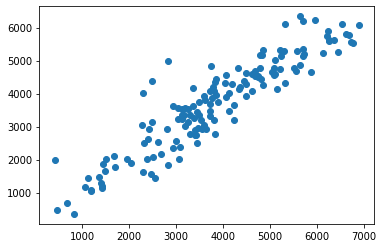

In [161]:
model = LinearRegression(fit_intercept = True).fit(x_tr.drop('const',axis=1),y_tr)
y_pred = model.predict(x_ts.drop('const', axis=1))
plt.scatter(y_ts, y_pred)

In [162]:
mean_squared_error(y_ts, y_pred), r2_score(y_ts, y_pred)

(373285.8696807488, 0.8355448205217033)

In [163]:
bag_lin_reg = BaggingRegressor(base_estimator= model,  n_estimators=5, bootstrap = True)
bag_lin_reg.fit(x_tr.drop('const',axis=1),y_tr)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=5)

<IPython.core.display.Javascript object>

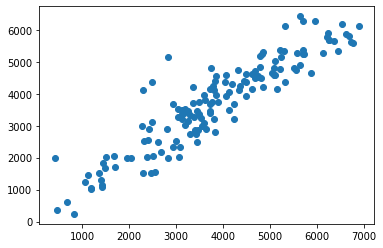

In [165]:
bag_linreg_y = bag_lin_reg.predict(x_ts.drop('const',axis=1))
plt.scatter(y_ts, bag_linreg_y)

In [166]:
mean_squared_error(y_ts, bag_linreg_y), r2_score(y_ts, bag_linreg_y)

(371952.8946159074, 0.8361320772901314)

### Hyperparameter tuning for bagging

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

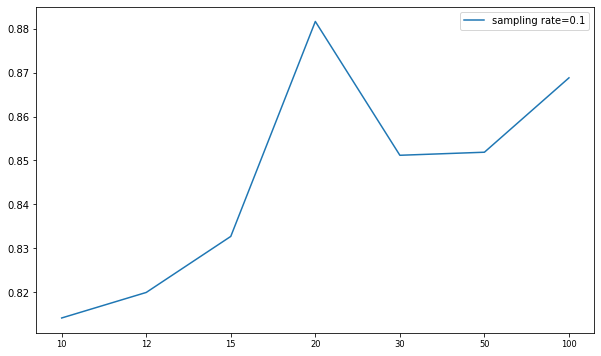

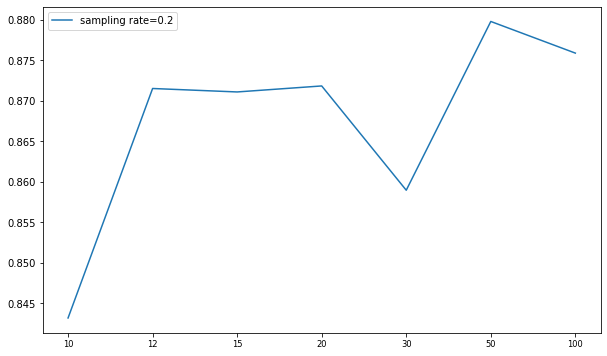

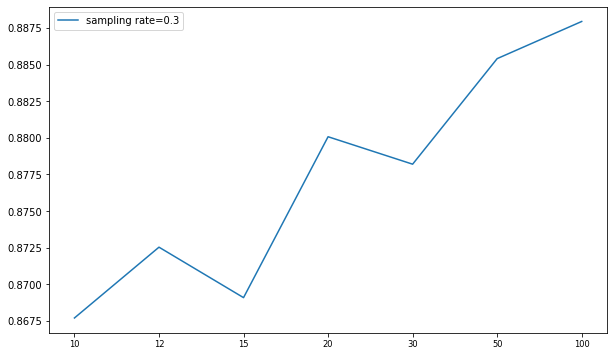

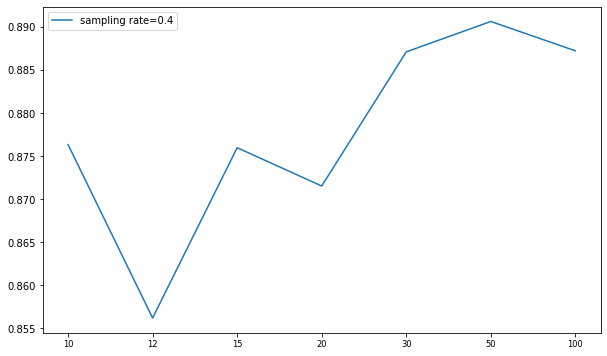

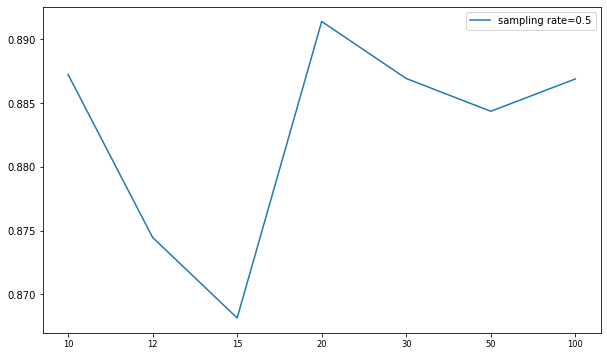

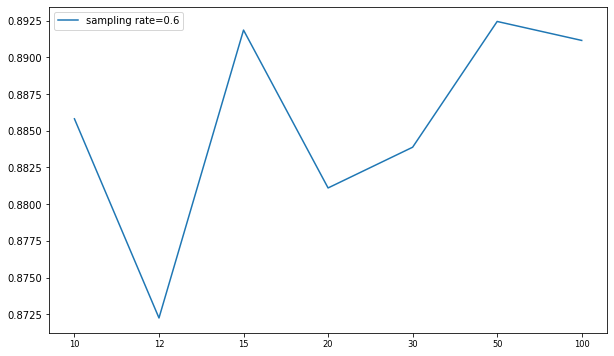

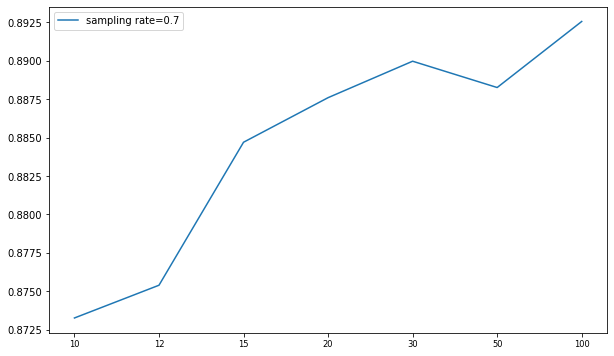

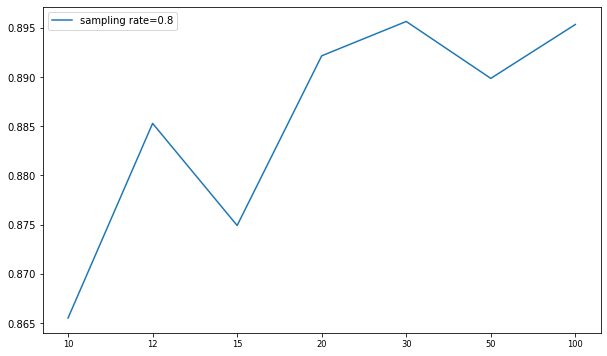

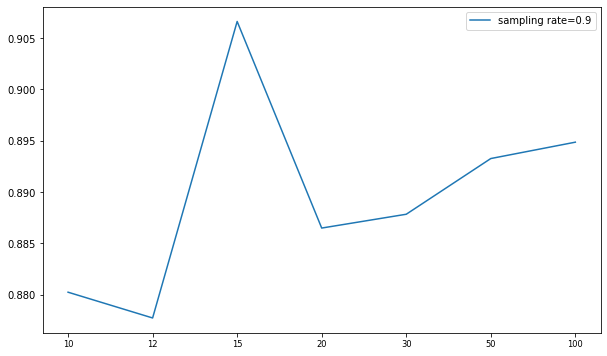

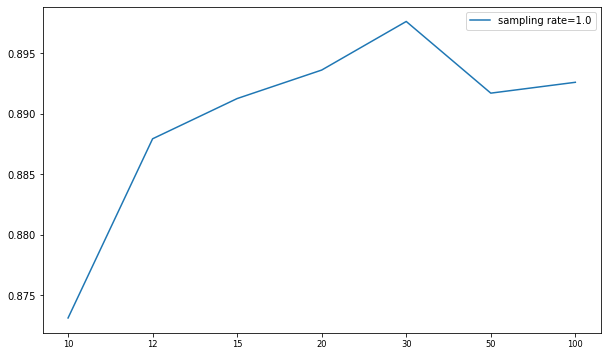

In [189]:
ts = range(1,11)
sampling_rates = [round(0.1*t, 1) for t in ts]
forest_sizes = [10, 12, 15, 20, 30, 50, 100]

for sampling_rate in sampling_rates:
        legend_label = 'sampling rate='+str(sampling_rate)
        accuracy_results = []
        for forest_size in forest_sizes:
            rf_clf = BaggingRegressor(base_estimator = regressor, n_estimators=forest_size, max_samples=sampling_rate)
            rf_clf.fit(x_tr, y_tr)
            predictions = rf_clf.predict(x_ts)
            accuracy = r2_score(y_ts, predictions)
            accuracy_results.append(accuracy)
        plt.figure(figsize=(10,6))
        plt.plot(range(len(forest_sizes)), accuracy_results, label=legend_label)

        plt.xticks(range(len(forest_sizes)), forest_sizes, size='small')
        plt.legend()
plt.show() 

In [183]:
sampling_rates, accuracy_results

([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 [0.8851690791013123,
  0.8988131942669836,
  0.888009989250851,
  0.8786001088032651,
  0.8960570962689216,
  0.8943578261025038,
  0.892209465718267])